In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, average_precision_score
from imblearn.over_sampling import SMOTE


In [15]:
train_grouped = pd.read_csv("Training_Set_grouped_binary.csv")
test_grouped = pd.read_csv("Testing_Set_grouped_binary.csv")


In [16]:
train_grouped = train_grouped.drop("Unnamed: 0", axis=1)
test_grouped = test_grouped.drop("Unnamed: 0", axis=1)


In [24]:
X_train = train_grouped.drop('readmitted', axis=1)
y_train = train_grouped['readmitted']
X_test = test_grouped.drop('readmitted', axis=1)
y_test = test_grouped['readmitted']



## Random Forest 

In [18]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Probabilities for PR AUC
    y_probs_train = model.predict_proba(X_train)[:, 1]
    y_probs_test = model.predict_proba(X_test)[:, 1]

    # Metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Train Recall': recall_score(y_train, y_pred_train),
        'Test Recall': recall_score(y_test, y_pred_test),
        'Train Precision': precision_score(y_train, y_pred_train),
        'Test Precision': precision_score(y_test, y_pred_test),
        'Train F1': f1_score(y_train, y_pred_train),
        'Test F1': f1_score(y_test, y_pred_test),
        'Train AUC': roc_auc_score(y_train, y_probs_train),
        'Test AUC': roc_auc_score(y_test, y_probs_test),
        'Train PR AUC': average_precision_score(y_train, y_probs_train),
        'Test PR AUC': average_precision_score(y_test, y_probs_test)
    }

    return metrics


## Random Forest (All Features, GridSearch)

In [19]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    scoring='roc_auc',  # Scoring metric, can be adjusted
    verbose=2
)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  19.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  13.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   6.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   6.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  13.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   6.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  13.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  20.0s
[CV] END max_depth=10, min

/Users/may/.julia/conda/3/x86_64/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Metrics for Best Model from Grid Search (All features):
Train Accuracy: 0.6522427639599332
Test Accuracy: 0.6336924088403378
Train Recall: 0.5172652117281161
Test Recall: 0.4942916168315755
Train Precision: 0.6717180434257309
Test Precision: 0.6368730736901093
Train F1: 0.5844596624016339
Test F1: 0.5565962656871748
Train AUC: 0.7167911394352839
Test AUC: 0.6814775138804883
Train PR AUC: 0.6993876034839427
Test PR AUC: 0.6464453555255903
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  12.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  19.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  19.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  13.4s
[CV] END max_depth=10, min_samples_leaf=2, min_sam

In [20]:
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_

# Use the evaluate_model function from your previous code to get metrics
metrics_best = evaluate_model(best_model, X_train, X_test, y_train, y_test)

print("Metrics for Best Model from Grid Search (All features):")
for key, value in metrics_best.items():
    print(f"{key}: {value}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Metrics for Best Model from Grid Search (All features):
Train Accuracy: 0.6522427639599332
Test Accuracy: 0.6336924088403378
Train Recall: 0.5172652117281161
Test Recall: 0.4942916168315755
Train Precision: 0.6717180434257309
Test Precision: 0.6368730736901093
Train F1: 0.5844596624016339
Test F1: 0.5565962656871748
Train AUC: 0.7167911394352839
Test AUC: 0.6814775138804883
Train PR AUC: 0.6993876034839427
Test PR AUC: 0.6464453555255903


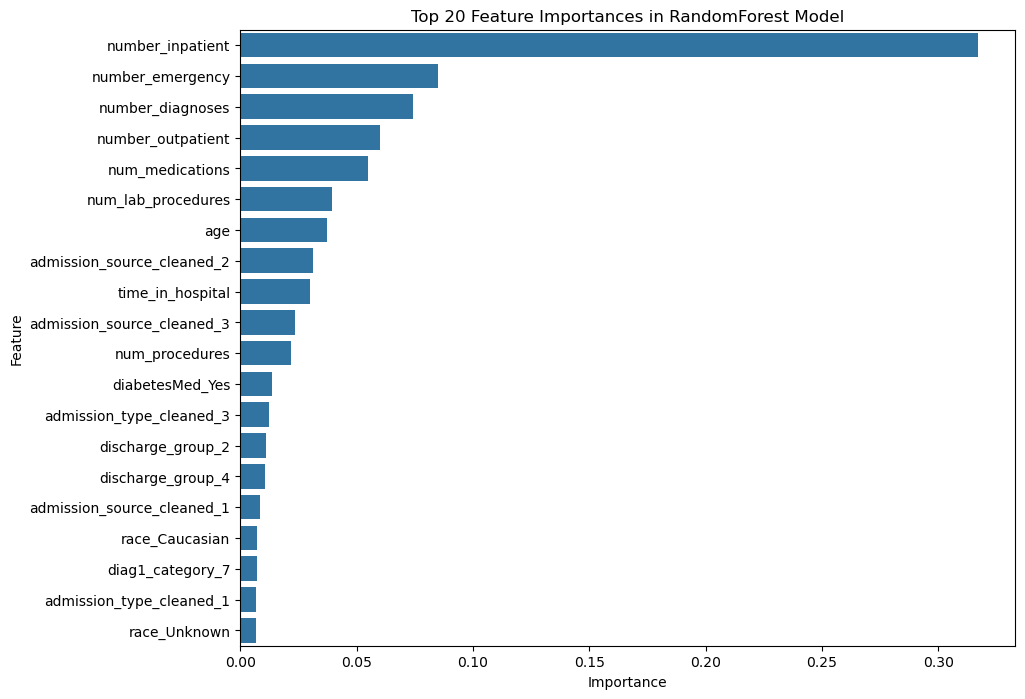

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = best_model.feature_importances_

# Get the feature names from your training set
features = X_train.columns  

# Creating a DataFrame for feature importances
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sorting the DataFrame based on importance and selecting the top 20
top_20_importances_df = importances_df.sort_values(by='Importance', ascending=False).head(20)

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the size of the figure as needed
sns.barplot(x='Importance', y='Feature', data=top_20_importances_df)

plt.title('Top 20 Feature Importances in RandomForest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Random Forest (Key features, GridSearch)

In [26]:
sub_features = [
    "age", "time_in_hospital", "num_lab_procedures", "num_procedures", 
    "num_medications", "number_outpatient", "number_emergency", "number_inpatient", 
    "number_diagnoses", "med_count_1", "med_count_2", "med_count_3", 
    "med_count_4", "med_count_6", "race_Caucasian", "race_Hispanic", 
    "race_Other", "race_Unknown", "gender_Male", "A1Cresult_>8", 
    "A1Cresult_Norm", "A1Cresult_Not Taken", "diabetesMed_Yes", 
    "med_change_1_NoMed", "med_change_1_Steady", "med_change_1_Up", 
    "med_change_2_NoMed", "med_change_2_Steady", "med_change_2_Up", 
    "med_change_3_NoMed", "med_change_3_Steady", "med_change_4_NoMed", 
    "med_change_4_Steady", "med_change_6_NoMed", "med_change_6_Steady", 
    "med_change_6_Up", "med_change_other_Yes", "discharge_group_2", 
    "discharge_group_3", "discharge_group_4", "discharge_group_7", 
    "admission_type_cleaned_1", "admission_type_cleaned_2", 
    "admission_type_cleaned_3", "admission_source_cleaned_1", 
    "admission_source_cleaned_2", "admission_source_cleaned_3", 
    "diag1_category_1", "diag1_category_2", "diag1_category_3", 
    "diag1_category_4", "diag1_category_5", "diag1_category_6", 
    "diag1_category_7", "diag1_category_8", "diag1_category_9", 
    "max_glu_serum_cleaned_>300", "max_glu_serum_cleaned_Norm", 
    "max_glu_serum_cleaned_Not Taken"
]


In [27]:
X_train = train_grouped[sub_features]
y_train = train_grouped['readmitted']  
X_test = test_grouped[sub_features]
y_test = test_grouped['readmitted']

In [28]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    scoring='roc_auc',  # Scoring metric, can be adjusted
    verbose=2
)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [30]:
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_

# Use the evaluate_model function from your previous code to get metrics
metrics_best = evaluate_model(best_model, X_train, X_test, y_train, y_test)

print("Metrics for Best Model from Grid Search (Select Features):")
for key, value in metrics_best.items():
    print(f"{key}: {value}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Metrics for Best Model from Grid Search (Select Features):
Train Accuracy: 0.6508351452235223
Test Accuracy: 0.6346533151266879
Train Recall: 0.5176373640979293
Test Recall: 0.49722735674676527
Train Precision: 0.6689683603009379
Test Precision: 0.6375296249825736
Train F1: 0.5836530392039323
Test F1: 0.5587049480757483
Train AUC: 0.7146029369594422
Test AUC: 0.6812730981637931
Train PR AUC: 0.6974253955156199
Test PR AUC: 0.6464241505949573


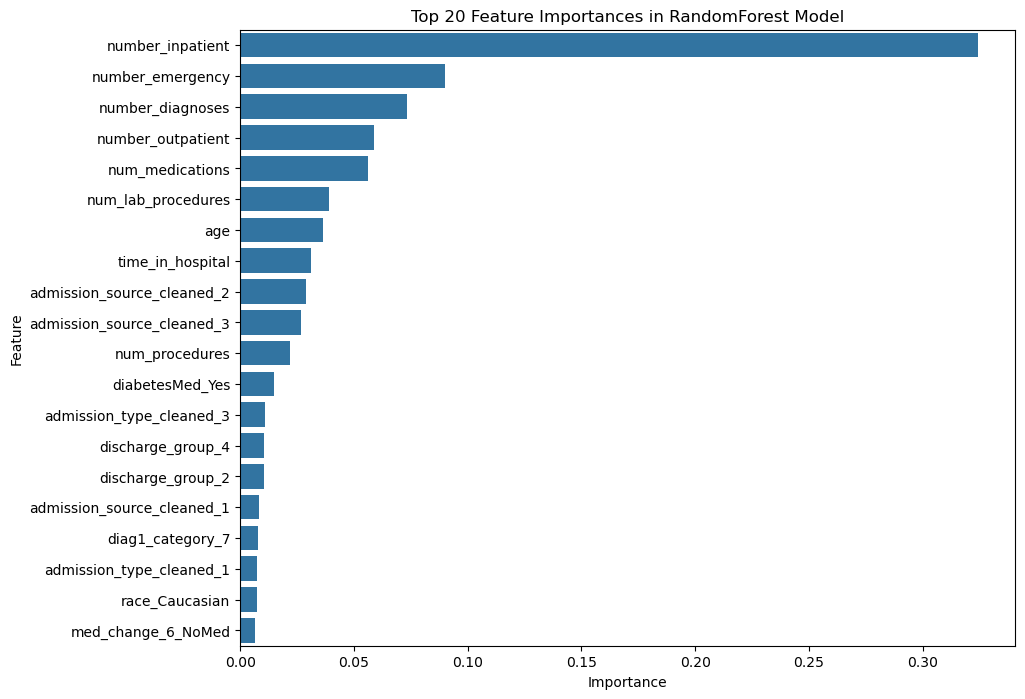

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  16.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  16.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  11.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   6.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   5.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  17.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  11.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total 

In [31]:
feature_importances = best_model.feature_importances_

# Get the feature names from your training set
features = X_train.columns  

# Creating a DataFrame for feature importances
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sorting the DataFrame based on importance and selecting the top 20
top_20_importances_df = importances_df.sort_values(by='Importance', ascending=False).head(20)

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the size of the figure as needed
sns.barplot(x='Importance', y='Feature', data=top_20_importances_df)

plt.title('Top 20 Feature Importances in RandomForest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()